In [ ]:
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv('/content/data.csv')

# Extract coordinates
coordinates = df[['coordinate_x', 'coordinate_y']].values

# Calculate distance matrix
num_cars = len(coordinates)
distance_matrix = np.zeros((num_cars, num_cars))

for i in range(num_cars):
    for j in range(num_cars):
        if i != j:
            distance_matrix[i, j] = np.sqrt(np.sum((coordinates[i] - coordinates[j]) ** 2))

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)


Distance Matrix:
[[    0.          1400.12637772  3300.80762296 ... 54324.16792943
  56024.21281733 56324.37749001]
 [ 1400.12637772     0.          1900.68132091 ... 52924.04294002
  54624.087903   54924.25265033]
 [ 3300.80762296  1900.68132091     0.         ... 51023.362592
  52723.40762858 53023.5724517 ]
 ...
 [54324.16792943 52924.04294002 51023.362592   ...     0.
   1700.04615782  2000.21371848]
 [56024.21281733 54624.087903   52723.40762858 ...  1700.04615782
      0.           300.17150915]
 [56324.37749001 54924.25265033 53023.5724517  ...  2000.21371848
    300.17150915     0.        ]]


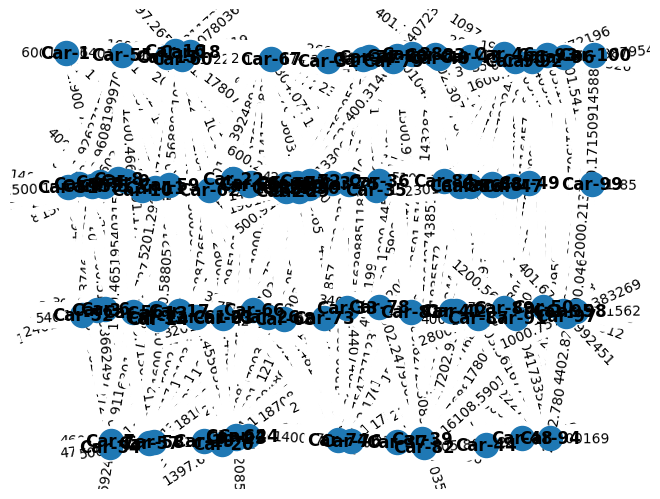

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('/content/data.csv')

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for each car
for i, row in df.iterrows():
    G.add_node(f'Car-{i+1}', pos=(row['coordinate_x'], row['coordinate_y']))

# Connect cars based on distances
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        distance = np.sqrt(np.sum((df.iloc[i, 1:3] - df.iloc[j, 1:3]) ** 2))
        G.add_edge(f'Car-{i+1}', f'Car-{j+1}', weight=distance)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
labels = {node: node for node in G.nodes}
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, labels=labels, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


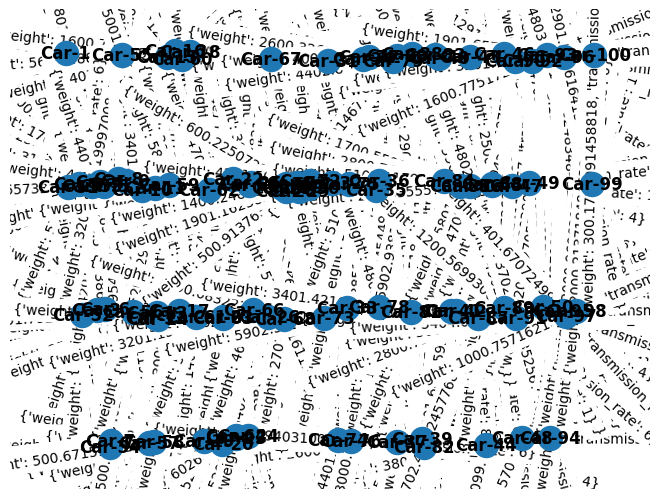

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset
df = pd.read_csv('/content/data.csv')

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for each car
for i, row in df.iterrows():
    G.add_node(f'Car-{i+1}', pos=(row['coordinate_x'], row['coordinate_y']))

# Connect cars based on distances and assign transmission rates
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        distance = np.sqrt(np.sum((df.iloc[i, 1:3] - df.iloc[j, 1:3]) ** 2))

        # Check if distance is longer than 6000 m
        if distance > 6000:
            transmission_rate = 0
        else:
            # Assign transmission rate based on distance
            if 6000 > distance >= 4000:
                transmission_rate = 1
            elif 4000 > distance >= 3000:
                transmission_rate = 2
            elif 3000 > distance >= 2000:
                transmission_rate = 4
            elif 2000 > distance >= 1000:
                transmission_rate = 6
            elif 1000 > distance >= 500:
                transmission_rate = 8
            elif distance < 500:
                transmission_rate = 10

            G.add_edge(f'Car-{i+1}', f'Car-{j+1}', weight=distance, transmission_rate=transmission_rate)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
labels = {node: node for node in G.nodes}
edge_labels = {(edge[0], edge[1]): {'weight': G.edges[edge]['weight'], 'transmission_rate': G.edges[edge]['transmission_rate']} for edge in G.edges}

nx.draw(G, pos, with_labels=True, labels=labels, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


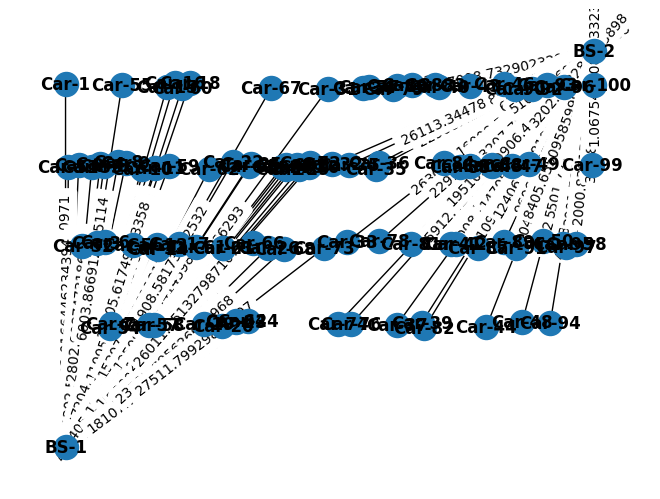

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset
df = pd.read_csv('/content/data.csv')

# Coordinates of base stations
bs1_coordinates = (-1, -1)
bs2_coordinates = (56325, 9)

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for each car
for i, row in df.iterrows():
    G.add_node(f'Car-{i+1}', pos=(row['coordinate_x'], row['coordinate_y']))

# Add nodes for base stations
G.add_node('BS-1', pos=bs1_coordinates)
G.add_node('BS-2', pos=bs2_coordinates)

# Connect cars to the nearest base station based on distances and assign transmission rates
for i in range(len(df)):
    distances_to_bs1 = np.sqrt(np.sum((df.iloc[i, 1:3] - np.array(bs1_coordinates)) ** 2))
    distances_to_bs2 = np.sqrt(np.sum((df.iloc[i, 1:3] - np.array(bs2_coordinates)) ** 2))

    # Choose the nearest base station
    nearest_bs = 'BS-1' if distances_to_bs1 < distances_to_bs2 else 'BS-2'

    # Connect car to the nearest base station
    G.add_edge(f'Car-{i+1}', nearest_bs, weight=distances_to_bs1 if nearest_bs == 'BS-1' else distances_to_bs2)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
labels = {node: node for node in G.nodes}
edge_labels = {(edge[0], edge[1]): G.edges[edge]['weight'] for edge in G.edges}

nx.draw(G, pos, with_labels=True, labels=labels, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('/content/data.csv')

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for each car
for i, row in df.iterrows():
    G.add_node(f'Car-{i+1}', pos=(row['coordinate_x'], row['coordinate_y']))

# Connect cars based on distances and assign transmission rates
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        distance = np.sqrt(np.sum((df.iloc[i, 1:3] - df.iloc[j, 1:3]) ** 2))
        if distance < 6000:
            transmission_rate = 0
            G.add_edge(f'Car-{i+1}', f'Car-{j+1}', weight=distance, transmission_rate=transmission_rate)

# Define delays for different transmission rates
transmission_delays = {0: 0, 1: 50, 2: 50, 4: 50, 6: 50, 8: 50, 10: 50}

# Calculate latency for each link in the graph
for u, v, data in G.edges(data=True):
    transmission_rate = data['transmission_rate']
    delay = transmission_delays[transmission_rate]
    G[u][v]['delay'] = delay

# Function to calculate end-to-end latency for a path
def calculate_end_to_end_latency(path, G):
    total_latency = 0
    for i in range(len(path) - 1):
        edge = G[path[i]][path[i + 1]]
        total_latency += edge['delay']
    return total_latency

# Example routing path
example_path = ['Car-5', 'Car-2', 'Car-1', 'BS-2']

# Calculate end-to-end latency for the example path
end_to_end_latency = calculate_end_to_end_latency(example_path, G)
print(f"End-to-end latency for the example path: {end_to_end_latency} ms")

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
labels = {node: node for node in G.nodes}
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, labels=labels, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


KeyError: ignored

In [ ]:
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv('/content/data.csv')

# Create a dictionary to store distances and transmission rates
distance_transmission_dict = {}

# Calculate distances and assign transmission rates
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        distance = np.sqrt(np.sum((df.iloc[i, 1:3] - df.iloc[j, 1:3]) ** 2))

        if distance >= 6000:
            transmission_rate = 0
        elif 6000 > distance >= 4000:
            transmission_rate = 1
        elif 4000 > distance >= 3000:
            transmission_rate = 2
        elif 3000 > distance >= 2000:
            transmission_rate = 4
        elif 2000 > distance >= 1000:
            transmission_rate = 6
        elif 1000 > distance >= 500:
            transmission_rate = 8
        else:
            transmission_rate = 10

        # Store in the dictionary
        distance_transmission_dict[(f'Car-{i+1}', f'Car-{j+1}')] = {'distance': distance, 'transmission_rate': transmission_rate}

# Print the dictionary
for key, value in distance_transmission_dict.items():
    print(f"Link: {key}, Distance: {value['distance']}, Transmission Rate: {value['transmission_rate']}")


Link: ('Car-1', 'Car-2'), Distance: 1400.1263777213621, Transmission Rate: 6
Link: ('Car-1', 'Car-3'), Distance: 3300.807622960825, Transmission Rate: 2
Link: ('Car-1', 'Car-4'), Distance: 3701.63455356241, Transmission Rate: 2
Link: ('Car-1', 'Car-5'), Distance: 4102.583770562924, Transmission Rate: 1
Link: ('Car-1', 'Car-6'), Distance: 4202.802820684817, Transmission Rate: 1
Link: ('Car-1', 'Car-7'), Distance: 4803.1053773261165, Transmission Rate: 1
Link: ('Car-1', 'Car-8'), Distance: 5603.688349586997, Transmission Rate: 1
Link: ('Car-1', 'Car-9'), Distance: 6403.874718717556, Transmission Rate: 0
Link: ('Car-1', 'Car-10'), Distance: 8104.0292811918025, Transmission Rate: 0
Link: ('Car-1', 'Car-11'), Distance: 9504.178987240859, Transmission Rate: 0
Link: ('Car-1', 'Car-12'), Distance: 9604.929731832699, Transmission Rate: 0
Link: ('Car-1', 'Car-13'), Distance: 9705.071935395403, Transmission Rate: 0
Link: ('Car-1', 'Car-14'), Distance: 9805.88066161424, Transmission Rate: 0
Link: 